In [1]:
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload

In [2]:
from approved_venders import get_approved_venders, get_arizona_listings
from approved_venders import get_listings_near, batch_listings_near, batch_arizona_listings

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib
matplotlib.style.use('ggplot')

### vender information

In [ ]:
venders = pd.DataFrame(json.loads(get_approved_venders())['bundle'])
venders.to_csv('../../data/Approved_Vendors.csv')

In [ ]:
venders.activeListings.describe()

In [ ]:
mesa_df = pd.DataFrame(json.loads(get_listings_near(offset=0))['bundle'])
#venders.to_csv('../../data/Approved_Vendors.csv')

In [ ]:
mesa_list = batch_listings_near()
mesa_df = pd.concat(mesa_list, axis=0)
mesa_df.to_csv('../../data/city_mesa_df.csv')

In [ ]:
phoenix_list = get_arizona_listings("phoenix")
phoenix_df = pd.concat(phoenix_list, axis=0)
phoenix_df.to_csv('../../data/city_phoenix_df.csv')

### Get AZ Listings

In [ ]:
az_list = batch_arizona_listings()
az_df = pd.concat(az_list2, axis=0)
az_df.to_csv('../../data/az_df.csv')

### generate fake data

In [23]:
from IPython.display import HTML

In [10]:
phoenix_df = pd.read_csv('../../data/city_phoenix_df.csv', index_col=0)

In [13]:
phoenix_df.city.value_counts()

Phoenix       2388
Mesa            81
Tempe            9
Gilbert          6
Scottsdale       3
Chandler         1
Name: city, dtype: int64

In [38]:
zip_avg_df = phoenix_df.groupby('zipCode').price.describe()

In [29]:
phoenix_df = phoenix_df.drop_duplicates()

In [67]:
cols = [
    'mlsListingID',
    'listDate',
    'bedrooms',
    'baths',
    'squareFootage',
    'price'
]

cols = ['price', 'bedrooms']

In [74]:
ind = (phoenix_df.bedrooms <= 5)

In [76]:
p_df = phoenix_df[ind].groupby('bedrooms').price.describe().unstack().reset_index()

In [77]:
final_df = pd.merge(phoenix_df[cols], p_df, left_on='bedrooms', right_on='bedrooms', suffixes=['','_agg'], how='inner')

In [78]:
final_df['job_value'] = (final_df['75%'] - final_df.price)/2.

In [81]:
final_df = final_df.sort_values(by='job_value', ascending=False)

In [104]:
pd.crosstab(phoenix_df[ind].ownership, phoenix_df[ind].subtype)

subtype,Apartment,Condominium,Duplex,Mobile Home,Single Family - Detached,Single Family Residence,Townhouse
ownership,,,,,,,
Co-Operative,9,1,0,0,0,0,2
Condominium,195,28,0,0,0,2,74
Fee Simple,99,15,4,3,1,1791,205
Leasehold,1,0,0,0,0,2,3


In [100]:
phoenix_df[ind].ownership.value_counts()

Fee Simple      2118
Condominium      299
Co-Operative      12
Leasehold          6
Name: ownership, dtype: int64

In [97]:
phoenix_df.columns[pd.Series(['type' in k for k in phoenix_df[ind].columns])]

Index(['subtype', 'type'], dtype='object')

In [106]:
phoenix_df.constructionMaterials.value_counts()

['Frame - Wood']                                                       958
['Block']                                                              833
['Brick']                                                              226
['Block', 'Frame - Wood']                                              149
['Frame - Metal']                                                       79
['Other (See Remarks)']                                                 47
['Block', 'Brick']                                                      29
['Brick', 'Frame - Wood']                                               25
['Slump Block']                                                         23
['Block', 'Brick', 'Frame - Wood']                                      12
['Adobe']                                                               11
['Block', 'Other (See Remarks)']                                         6
['Block', 'Frame - Metal']                                               6
['Frame - Metal', 'Frame 

In [109]:
final_df.T.to_json(path_or_buf='../../data/phoenix.json')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f803080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10feacda0>]], dtype=object)

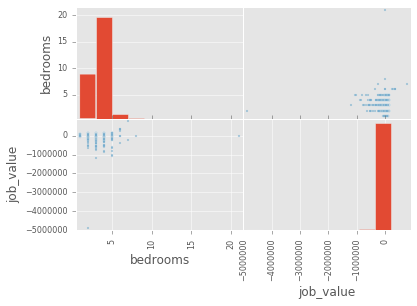

In [66]:
pd.scatter_matrix(final_df[['bedrooms', 'job_value']])

In [24]:
HTML(phoenix_df.head(1).T.to_html())

,0
aboveGradeFinishedArea,NaN
accessibilityFeatures,NaN
acres,0.261157
additionalParcels,NaN
address,"E 2339 NANCE Circle, Mesa AZ"
agent,b8e73209730a0be146cfe877261d7ef9
appliances,NaN
baths,3
bedrooms,5
belowGradeFinishedArea,NaN


### Analyze Data

In [ ]:
az_df.to_csv('../../data/az_df.csv')

In [ ]:
c = ['baths',
'bedrooms',
'acres',
'squareFootage',
'closePrice',
'daysOnMarket',
'originalPrice',
'price',
'yearBuilt']

In [ ]:
df = az_df[(np.abs(stats.zscore(az_df)) < 3).all(axis=1)]

In [ ]:
df

In [ ]:
pd.scatter_matrix(az_df[c], figsize=(13, 10))
print('AZ 54000+ Listings')

In [ ]:
az_df.to_csv('../../data/az_df.csv')

In [ ]:
mesa_df.city.value_counts()

In [ ]:
m = mesa_df.dropna(axis=1, how='all')

In [ ]:
m.closePrice.dropna().astype(int).describe()

In [ ]:
(mesa_df.closePrice - mesa_df.originalPrice)

In [ ]:
dt = pd.DatetimeIndex(pd.to_datetime(mesa_df.listDate.astype('datetime64[s]'), infer_datetime_format=True).values)


In [ ]:
s = pd.Series(1, index=dt)
s.resample('D', how='sum').fillna(0)

In [ ]:
# s.resample('D', how='sum').plot()

In [ ]:
s.resample('D', how='sum').fillna(0)